In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_alterp_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Terpinene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Alpha-Terpinene', 'index'], axis = 1)
y = df_knn[['X..Alpha-Terpinene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.75],
       [0.75],
       [0.75],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

<AxesSubplot:ylabel='Count'>

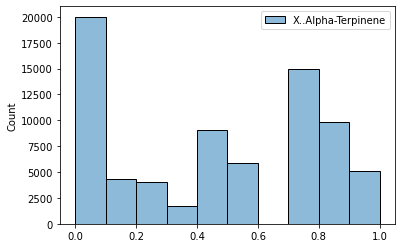

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.06439928449328446

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.0226721187271733

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1505726360504235

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8916224045935304

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8140599272303014

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([8.39596902e-02, 9.09039188e-02, 9.76923046e-02, 7.79402109e-02,
       8.53541090e-02, 8.45395953e-02, 0.00000000e+00, 1.68639660e-01,
       3.35500056e-03, 1.99649361e-03, 5.96796636e-03, 2.93457919e-08,
       5.89289137e-03, 3.82917666e-04, 5.38249675e-03, 4.67228845e-03,
       1.16106945e-02, 5.68786629e-03, 2.31901495e-08, 5.46968602e-03,
       3.39195174e-08, 4.11472527e-07, 6.15852033e-03, 5.43413735e-03,
       6.85475200e-03, 2.10537461e-03, 4.72383715e-03, 2.48569636e-04,
       5.32976481e-07, 3.63919742e-03, 1.03719998e-02, 3.89687053e-07,
       5.41050438e-03, 6.35797629e-06, 3.83364138e-07, 5.48168096e-03,
       3.55273212e-03, 5.35258915e-03, 4.55466112e-04, 1.61237322e-04,
       1.78330758e-04, 1.00175538e-02, 1.38149451e-03, 4.00771558e-03,
       2.41669565e-04, 3.70684900e-03, 2.00597885e-03, 4.33667166e-04,
       8.55171134e-03, 2.20200250e-03, 3.18319090e-02, 5.08253551e-03,
       3.08806414e-03, 1.28297181e-03, 5.00903420e-03, 9.72197609e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,diesel,lemon
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'diesel',
 'lemon']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_alterp.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_alterp.pkl")

['selector_knn_lsa_elbow_alterp.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.06972501602564099

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.02433054201861998

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.155982505488981

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8852293153824471

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8013444118340818

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.039511357650889325

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.128245233341552

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9865250010339469

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8657137746333621

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_alterp.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_alterp.pkl")

['y_test_knreg_lsa_elbow_alterp.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03819694504049425

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01655245843118072

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12865635791200028

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.861589901795771

In [65]:
y_test

,X..Alpha-Terpinene
11591,0.750000
52020,0.750000
34666,0.875000
22169,1.000000
23049,1.000000
...,...
60863,0.500000
32316,0.875000
60933,0.500000
43206,0.416667


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

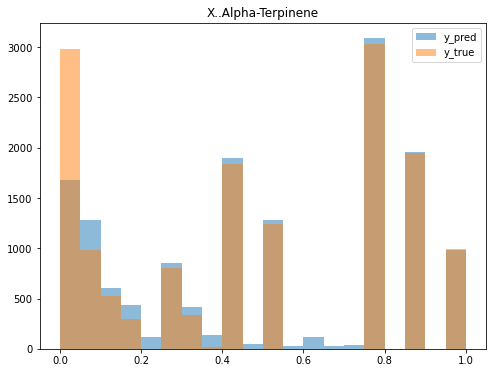

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Terpinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_alterp.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.932
P-value: 0.000


<AxesSubplot:>

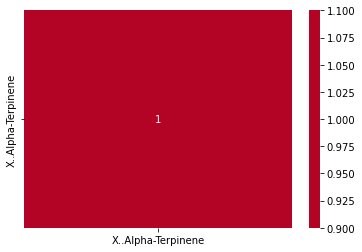

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)